In [1]:
import numpy as np
import pandas as pd

In [14]:
dataset = pd.read_csv("petrol_consumption.csv")

In [15]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [16]:
x = dataset.drop('Petrol_Consumption', axis = 1)
y = dataset['Petrol_Consumption']

In [35]:
x.shape, y.shape

((48, 4), (48,))

In [6]:
import matplotlib.pyplot as plt

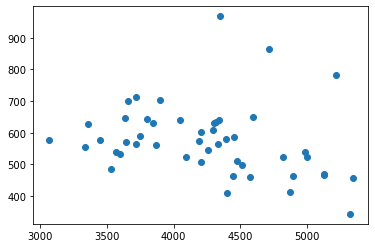

In [7]:
plt.scatter(dataset['Average_income'],dataset['Petrol_Consumption'])

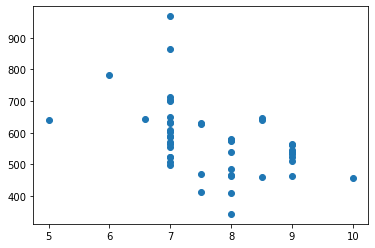

In [8]:
plt.scatter(dataset['Petrol_tax'], dataset['Petrol_Consumption'])

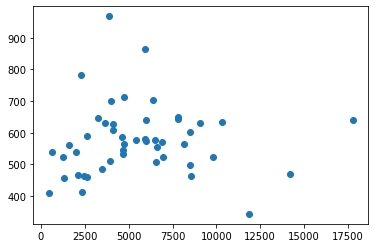

In [9]:
plt.scatter(dataset['Paved_Highways'], dataset['Petrol_Consumption'])

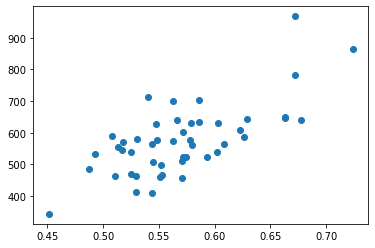

In [82]:
plt.scatter(dataset['Population_Driver_licence(%)'], dataset['Petrol_Consumption'])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
reg = DecisionTreeRegressor(max_depth=20, random_state=1)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=20, random_state=1)

In [26]:
predict = reg.predict(x_test)

In [27]:
df = pd.DataFrame({'Actual':y_test, 'Predicted': predict})
df

,Actual,Predicted
46,610,628.0
1,524,561.0
27,631,635.0
28,574,577.0
31,554,591.0
16,603,635.0
38,648,566.0
34,487,541.0
41,699,628.0
9,498,460.0


In [28]:
y_test.values[2], predict[2]

(631, 635.0)

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test, predict)

-0.2301809581737917

In [27]:
from sklearn import metrics
print("Mean absolute error is: ", metrics.mean_absolute_error(y_test, predict))
print("Mean squared error is: ", metrics.mean_squared_error(y_test, predict))
print("Mean squared error is: ", np.sqrt(metrics.mean_squared_error(y_test, predict)))

Mean absolute error is:  84.25384615384614
Mean squared error is:  9591.988757396448
Mean squared error is:  97.93869897745451


In [31]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image
import pydotplus

In [32]:
features = list(dataset.columns[:4])
features

['Petrol_tax',
 'Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)']

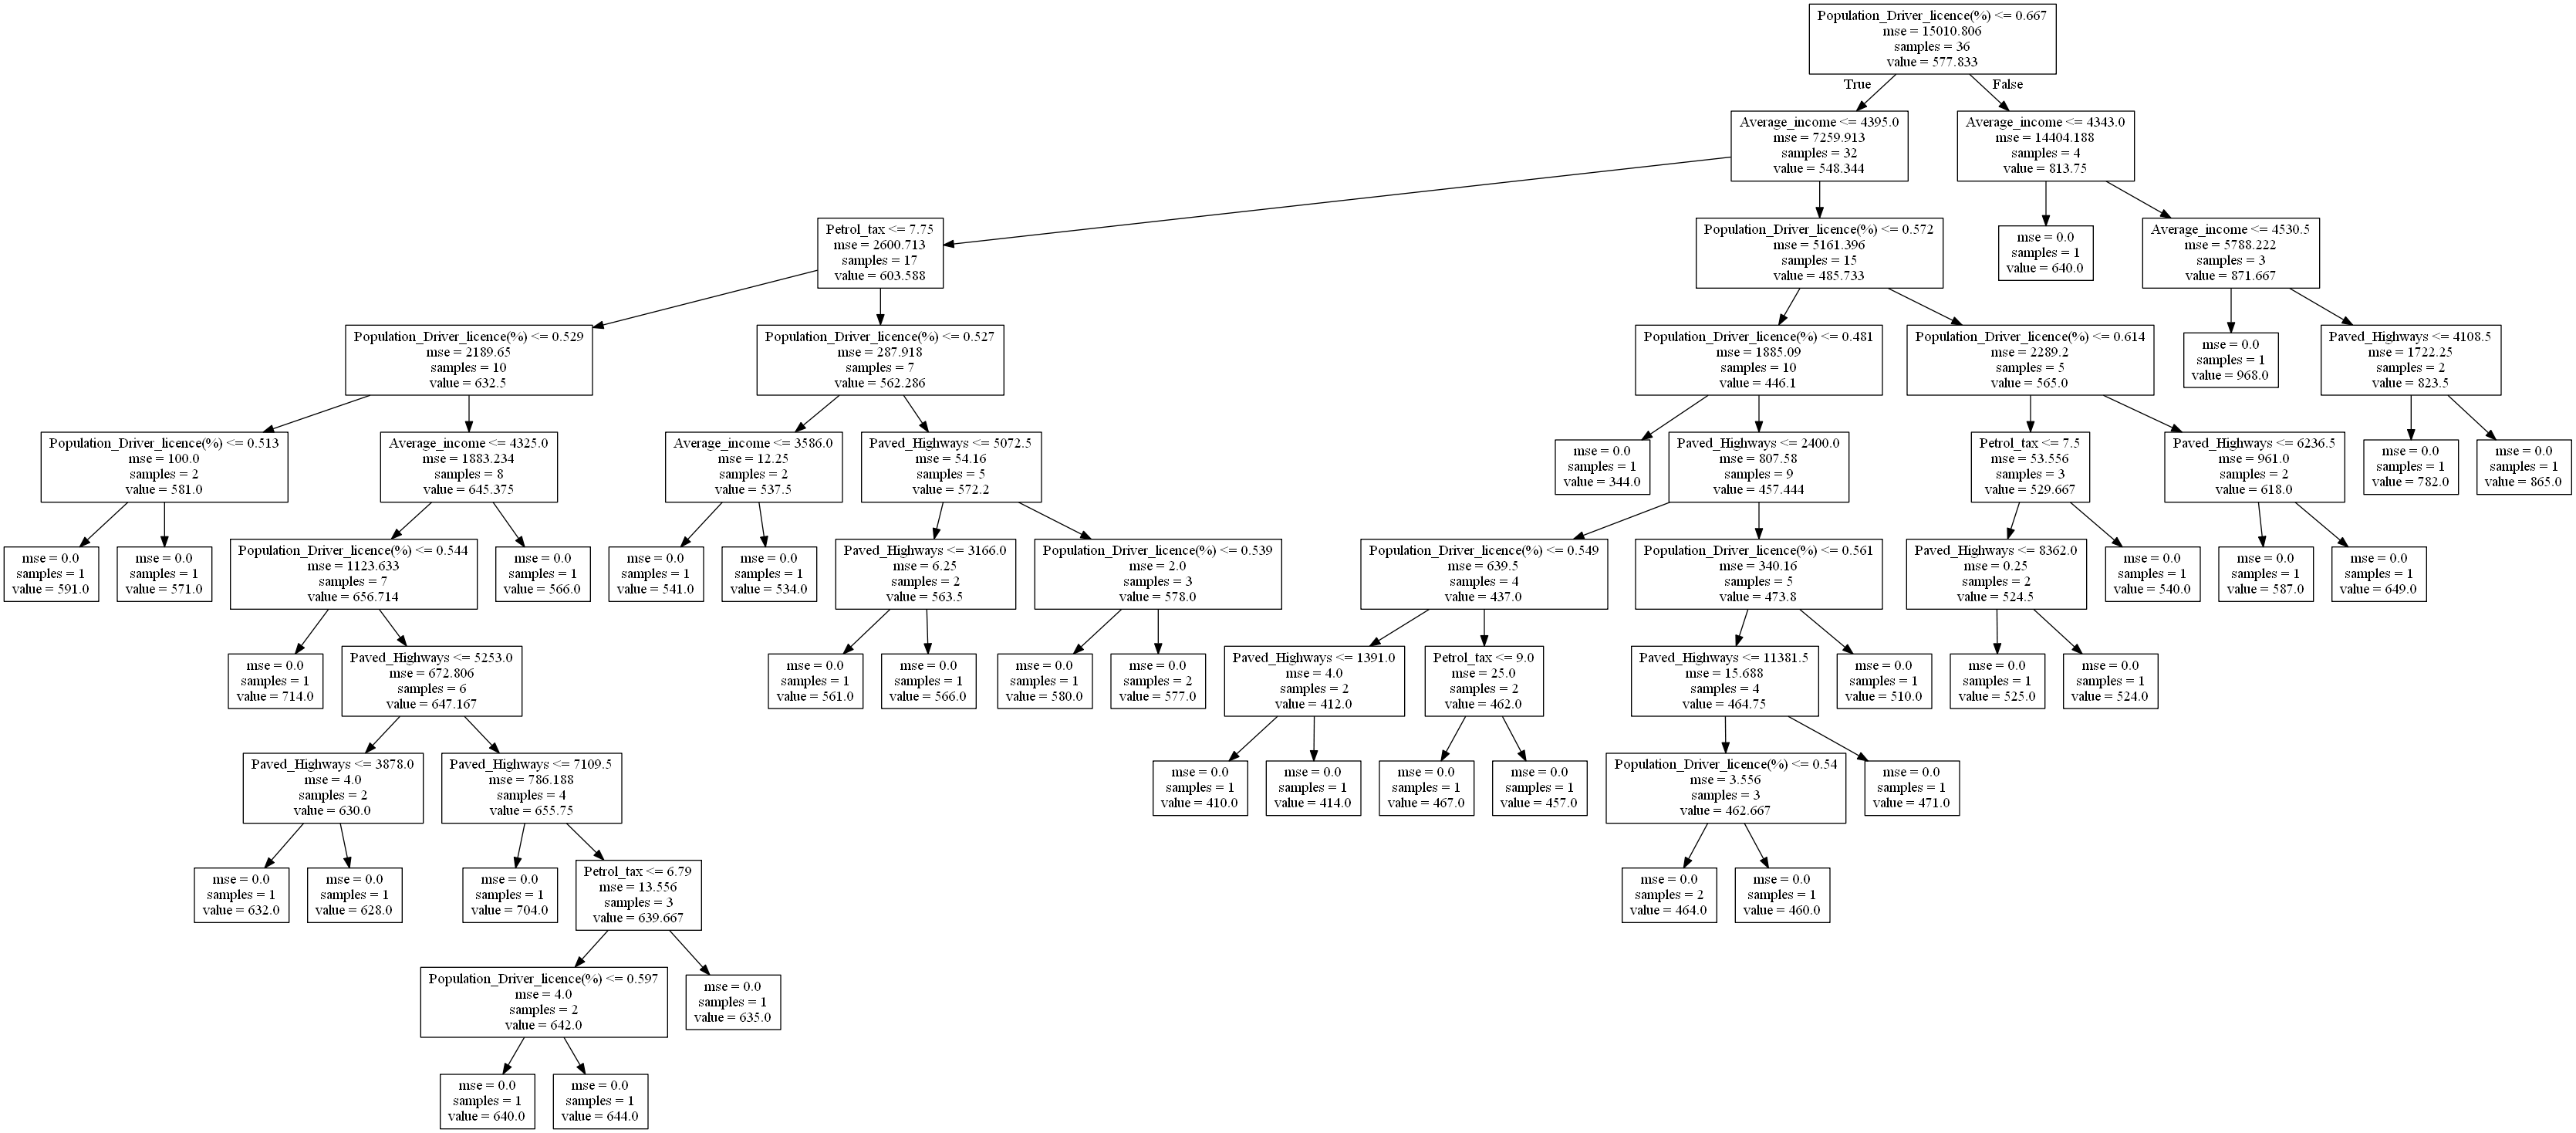

In [34]:
f = StringIO()  
export_graphviz(reg, out_file=f, feature_names=features)  
graph = pydotplus.graph_from_dot_data(f.getvalue())  
Image(graph.create_png())  

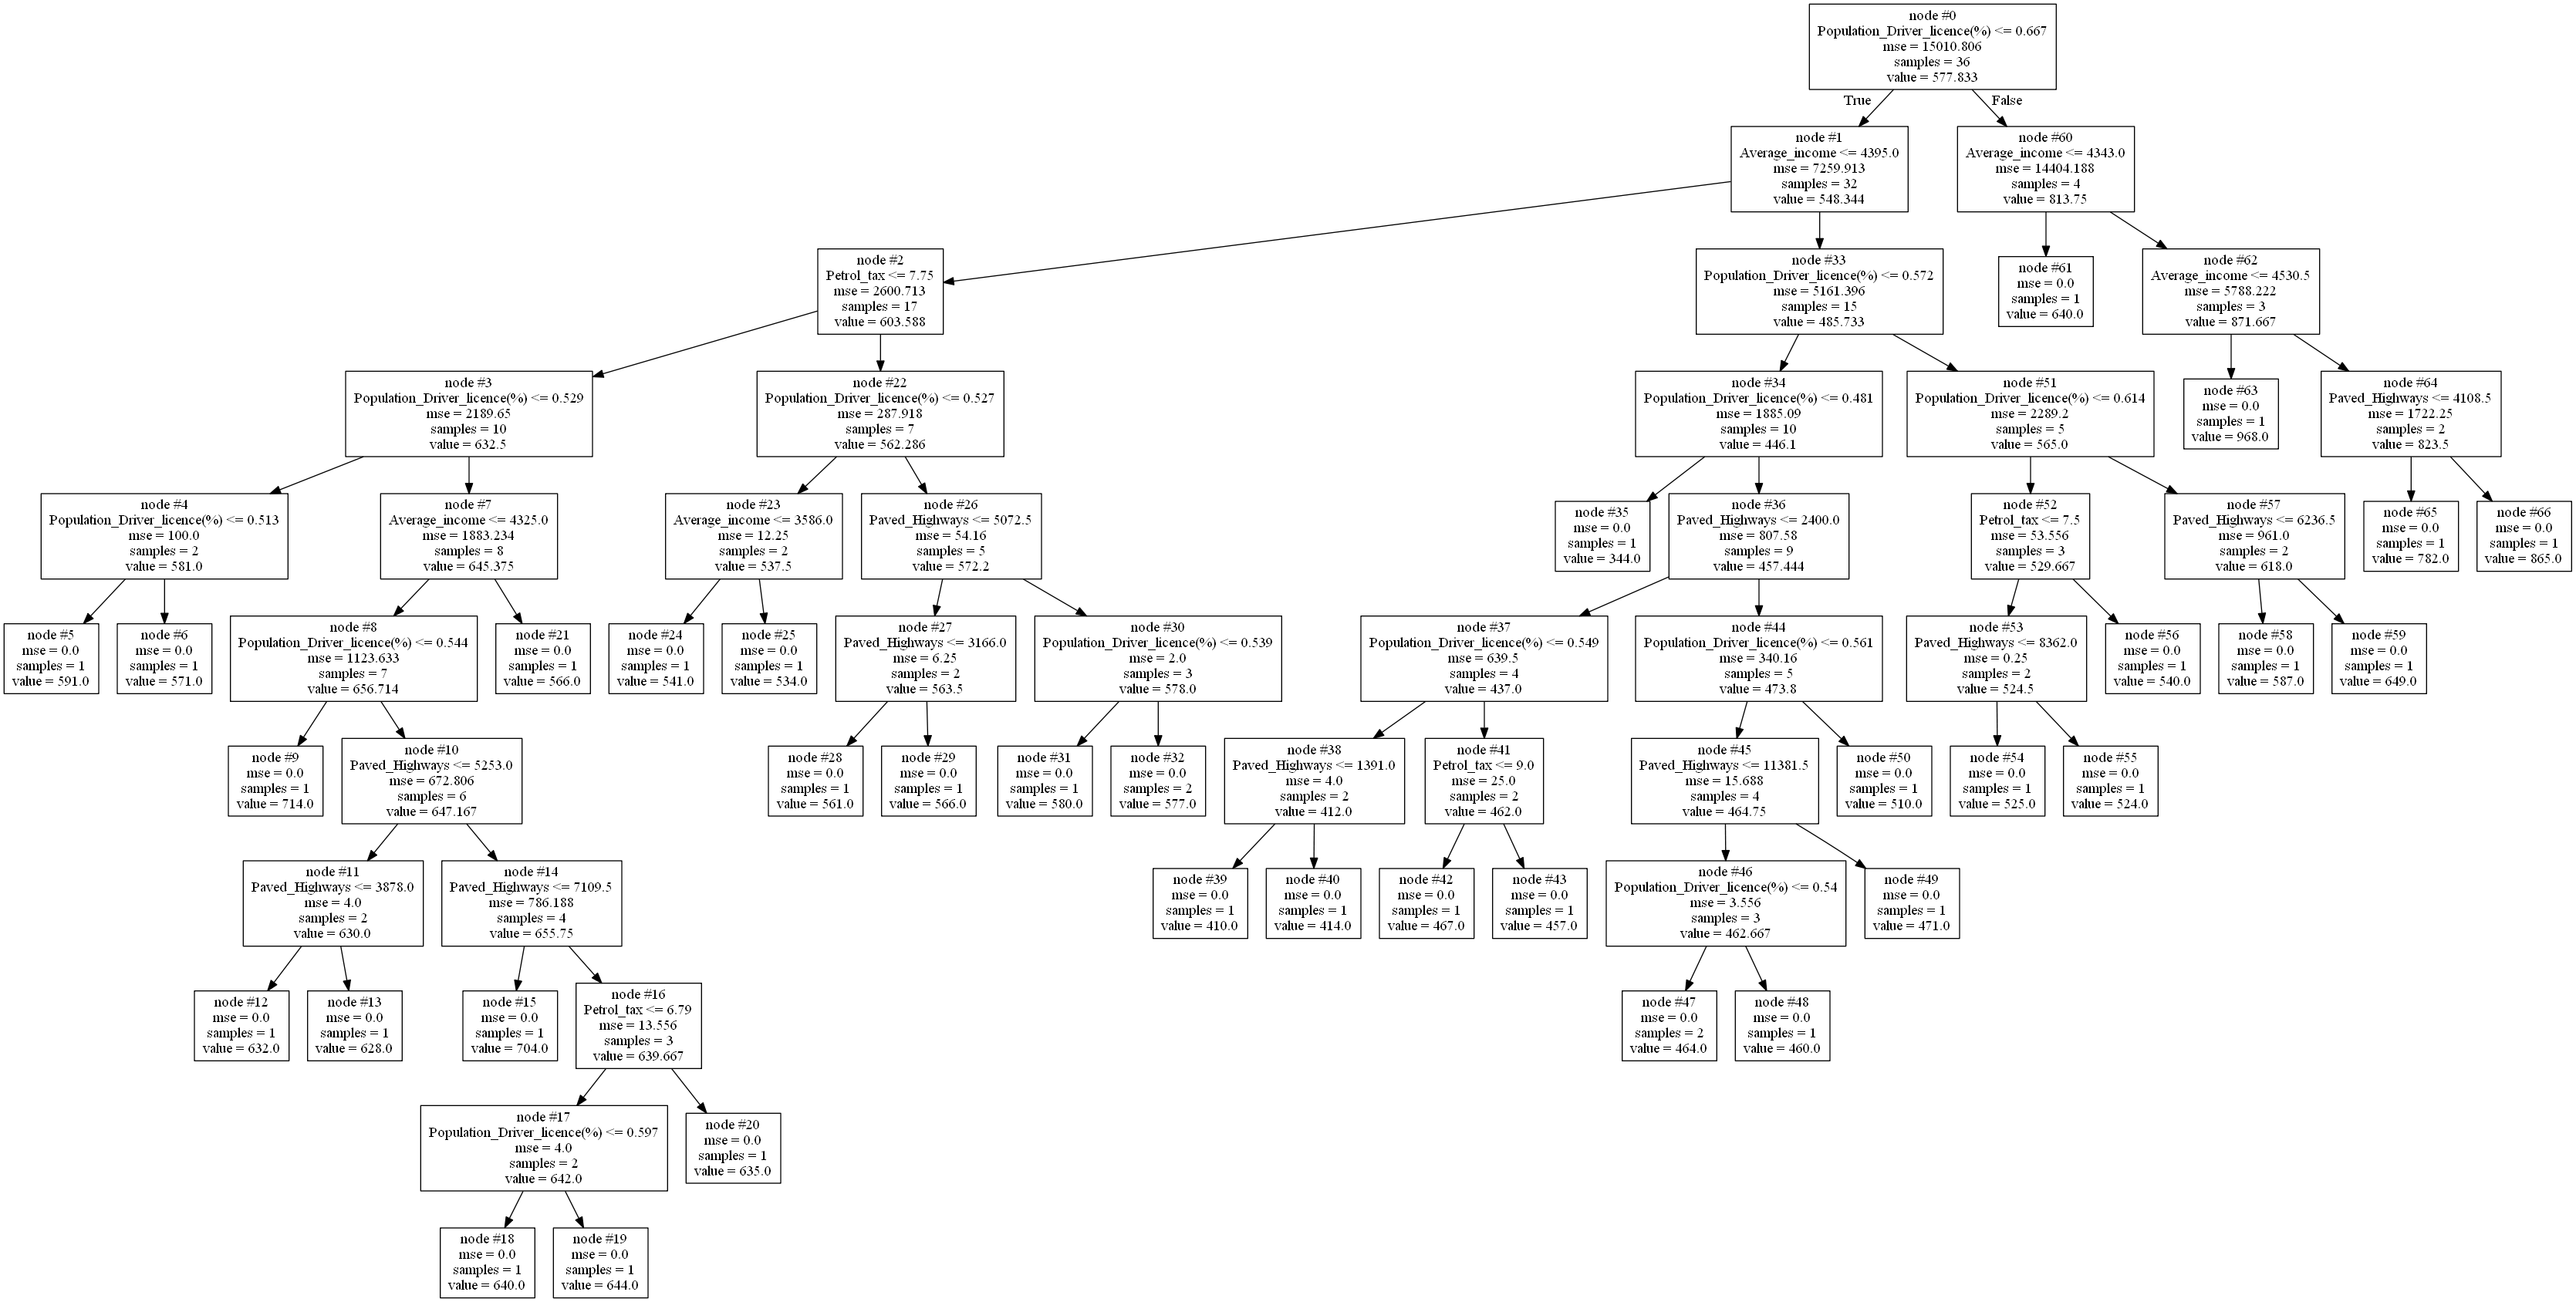

In [35]:
f = StringIO()  
export_graphviz(reg, out_file=f, feature_names=features, impurity = True, node_ids = True)  
graph = pydotplus.graph_from_dot_data(f.getvalue())  
Image(graph.create_png())  